In [21]:
from shapely.geometry import Point,mapping, LineString, Polygon
import numpy as np
import rasterio
from rasterio import plot, mask
from rtree import index
import networkx as nx
import geopandas as gpd
import os
import matplotlib.pyplot as plt
from cartopy import crs

In [22]:
study_area_shapely = Polygon([(275000,77000),(276000,77000),(276000,78000),(275000,78000)])
#study_area_shp = gpd.read_file(os.path.join('Study_area','study_area.shp'))
Haytor_map = rasterio.open(
        os.path.join('OS Explorer Maps', 'Download_SX77-Haytor_2033809', 'raster-25k_4596071', 'sx', 'sx77.tif'))
elevation = rasterio.open(os.path.join('OS Elevation','Download_Haytor_Elevation_2035988','terrain-5-dtm_4600215','sx','SX77NE.asc'))

study_area = mapping(study_area_shapely)
elevation_mask, transform_index = mask.mask(elevation,[study_area], filled=False, crop=False)

network_links = gpd.read_file(os.path.join('Study_area','network_links.geojson'))
network_nodes = gpd.read_file(os.path.join('Study_area','network_nodes.geojson'))

## Polygon
Removing Points where boundary or water is

In [23]:
master_map_polygons = gpd.read_file(os.path.join('MasterMap','Download_SX77+-+Haytor_2035912','mastermap-topo_4600023','mastermap-topo_4600023.gpkg'), layer="Topographicarea")

remove all links and nodes which

C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\pygeos\set_operations.py:129: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  from ipykernel import kernelapp as app
C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\ipykernel_launcher.py:33: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.


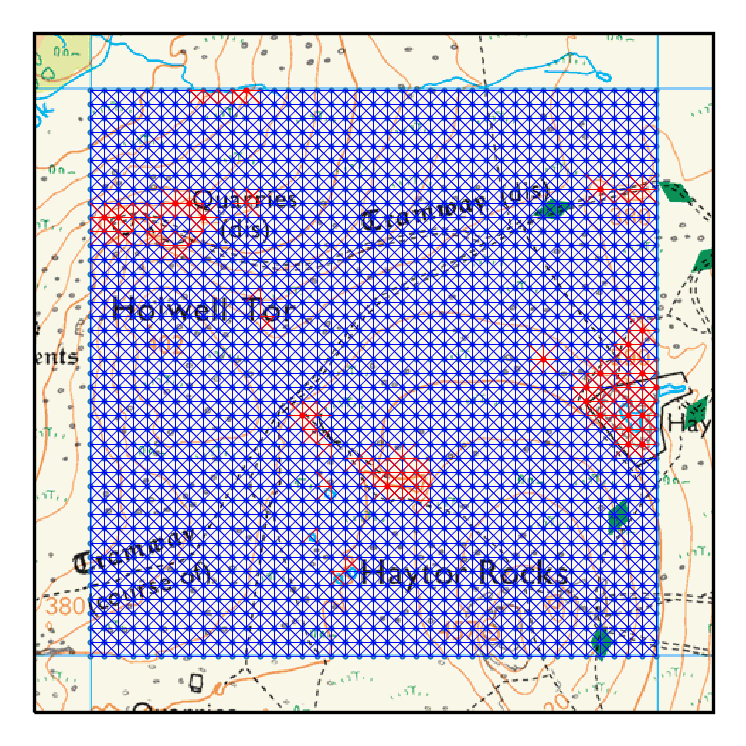

In [24]:
all_obstructions = master_map_polygons.query('descriptiveterm =="Slope" or descriptiveterm =="Cliff" or descriptivegroup =="Inland Water"')
obstructions = all_obstructions.intersection(study_area_shapely)
obstructions = obstructions[~obstructions.is_empty]
obstructions_gpd = gpd.GeoDataFrame(geometry=obstructions)

Intersecting_nodes = gpd.sjoin(network_nodes,obstructions_gpd)
Intersecting_links = gpd.sjoin(network_links,obstructions_gpd)

back_array = Haytor_map.read(1)
palette = np.array([value for key, value in Haytor_map.colormap(1).items()])
background_image = palette[back_array]
bounds = Haytor_map.bounds
extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
fig = plt.figure(figsize=(3, 3), dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=crs.OSGB())

# display background map
ax.imshow(background_image, origin='upper', extent=extent, zorder=0)

# displaying nodes
network_nodes.plot(ax=ax,zorder = 2,markersize=0.2)
#displaying links
network_links.plot(ax=ax,zorder = 2,edgecolor='blue', linewidth=0.2)

# intersecting with water
Intersecting_nodes.plot(ax=ax,zorder=3,markersize=0.2,color='red')
Intersecting_links.plot(ax=ax,zorder=3,edgecolor='red', linewidth=0.2)
#set the extent to the study area
#study_area_gpd.plot(ax=ax,zorder = 2)
display_extent = ((study_area_shapely.bounds[0]- 100, study_area_shapely.bounds[2]+ 100,
                       study_area_shapely.bounds[1]- 100, study_area_shapely.bounds[3]+ 100))

ax.set_extent(display_extent, crs=crs.OSGB())
plt.show()

In [25]:
network_nodes = network_nodes[~ network_nodes.isin(Intersecting_nodes)].dropna()

In [26]:
cond = network_links['fid'].isin(Intersecting_links['fid'])
network_links.drop(network_links[cond].index, inplace = True)

C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  
C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  app.launch_new_instance()


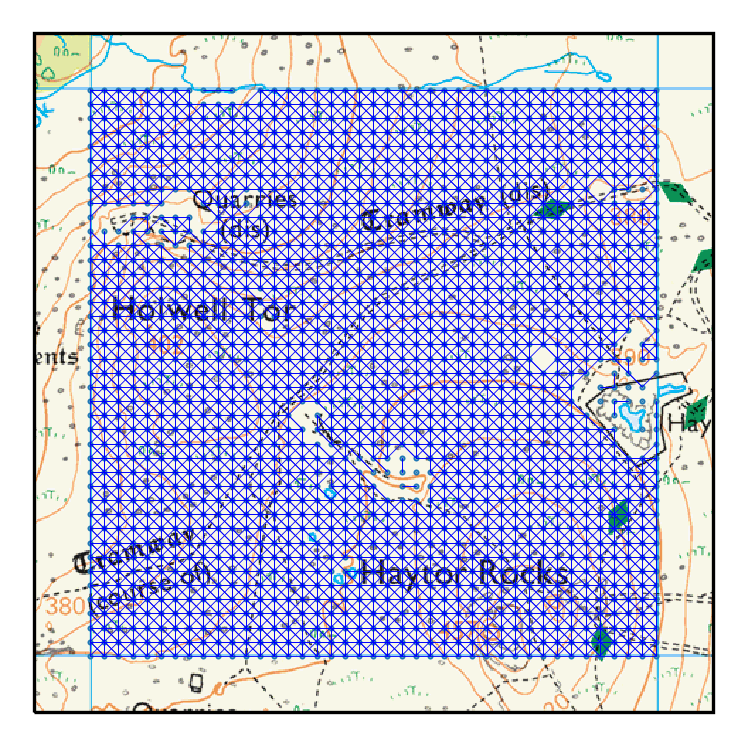

In [27]:
fig = plt.figure(figsize=(3, 3), dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=crs.OSGB())

# display background map
ax.imshow(background_image, origin='upper', extent=extent, zorder=0)

# displaying nodes
network_nodes.plot(ax=ax,zorder = 2,markersize=0.2)
#displaying links
network_links.plot(ax=ax,zorder = 2,edgecolor='blue', linewidth=0.2)
#set the extent to the study area
#study_area_gpd.plot(ax=ax,zorder = 2)
display_extent = ((study_area_shapely.bounds[0]- 100, study_area_shapely.bounds[2]+ 100,
                       study_area_shapely.bounds[1]- 100, study_area_shapely.bounds[3]+ 100))

ax.set_extent(display_extent, crs=crs.OSGB())
plt.show()



## Lines
Remove nodes and links where obstructing features are

In [28]:
master_map_lines = gpd.read_file(os.path.join('MasterMap','Download_SX77+-+Haytor_2035912','mastermap-topo_4600023','mastermap-topo_4600023.gpkg'), layer="Topographicline")

C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\pygeos\set_operations.py:129: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  from ipykernel import kernelapp as app
C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\geopandas\plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\ipykernel_launcher.py:33: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.


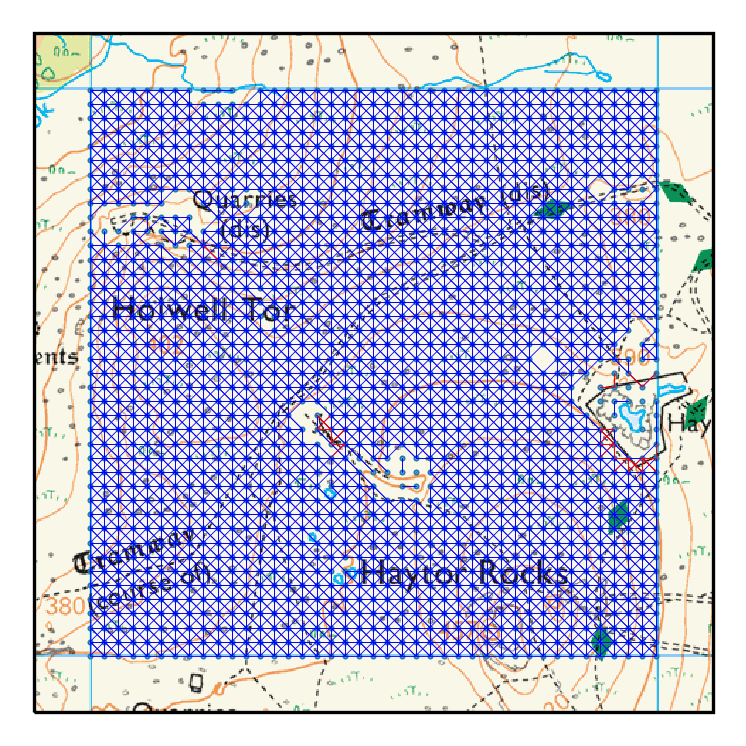

In [29]:
all_obstructions = master_map_lines.query('physicalpresence =="Obstructing" or descriptiveterm =="Bottom Of Slope" or descriptiveterm =="Bottom Of Cliff" or descriptiveterm =="Top Of Slope" or descriptiveterm =="Top Of Cliff"')
obstructions = all_obstructions.intersection(study_area_shapely)
obstructions = obstructions[~obstructions.is_empty]
obstructions_gpd = gpd.GeoDataFrame(geometry=obstructions)

Intersecting_nodes = gpd.sjoin(network_nodes,obstructions_gpd)
Intersecting_links = gpd.sjoin(network_links,obstructions_gpd)

back_array = Haytor_map.read(1)
palette = np.array([value for key, value in Haytor_map.colormap(1).items()])
background_image = palette[back_array]
bounds = Haytor_map.bounds
extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
fig = plt.figure(figsize=(3, 3), dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=crs.OSGB())

# display background map
ax.imshow(background_image, origin='upper', extent=extent, zorder=0)

# displaying nodes
network_nodes.plot(ax=ax,zorder = 2,markersize=0.2)
#displaying links
network_links.plot(ax=ax,zorder = 2,edgecolor='blue', linewidth=0.2)

# intersecting with water
Intersecting_nodes.plot(ax=ax,zorder=3,markersize=0.2,color='red')
Intersecting_links.plot(ax=ax,zorder=3,edgecolor='red', linewidth=0.2)
#set the extent to the study area
#study_area_gpd.plot(ax=ax,zorder = 2)
display_extent = ((study_area_shapely.bounds[0]- 100, study_area_shapely.bounds[2]+ 100,
                       study_area_shapely.bounds[1]- 100, study_area_shapely.bounds[3]+ 100))

ax.set_extent(display_extent, crs=crs.OSGB())
plt.show()

In [30]:
network_nodes = network_nodes[~ network_nodes.isin(Intersecting_nodes)].dropna()
cond = network_links['fid'].isin(Intersecting_links['fid'])
network_links.drop(network_links[cond].index, inplace = True)

C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  
C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  app.launch_new_instance()


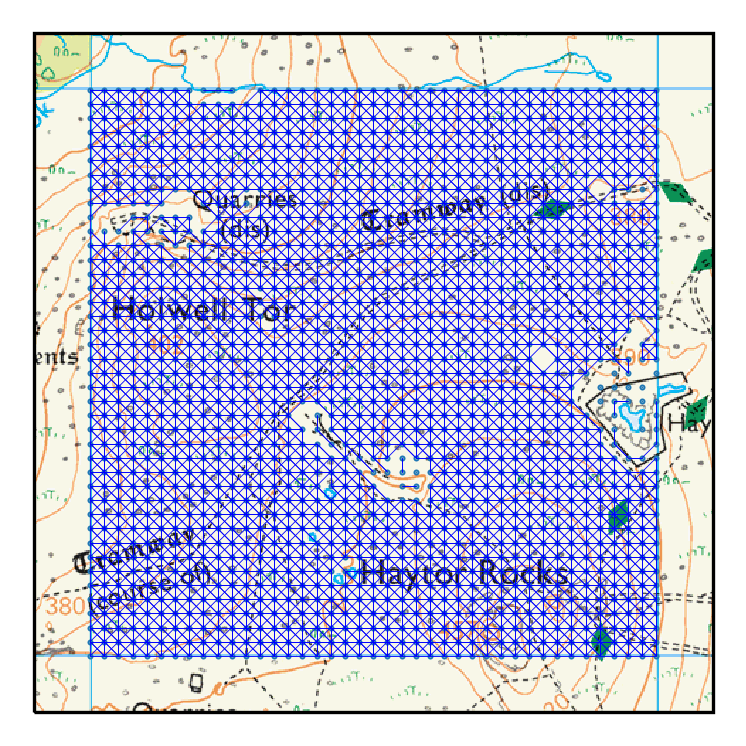

In [31]:
fig = plt.figure(figsize=(3, 3), dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=crs.OSGB())

# display background map
ax.imshow(background_image, origin='upper', extent=extent, zorder=0)

# displaying nodes
network_nodes.plot(ax=ax,zorder = 2,markersize=0.2)
#displaying links
network_links.plot(ax=ax,zorder = 2,edgecolor='blue', linewidth=0.2)
#set the extent to the study area
#study_area_gpd.plot(ax=ax,zorder = 2)
display_extent = ((study_area_shapely.bounds[0]- 100, study_area_shapely.bounds[2]+ 100,
                       study_area_shapely.bounds[1]- 100, study_area_shapely.bounds[3]+ 100))

ax.set_extent(display_extent, crs=crs.OSGB())
plt.show()

Creating the Network(Grouped)

In [32]:
graph = nx.Graph()
for index, row in network_links.iterrows():
    graph.add_edge(row['startnode'], row['endnode'], fid=row['fid'], weight=row['length'] )

path = nx.dijkstra_path(graph, source=1, target=1665, weight="weight")

geom = []
links = []
first_node = path[0]
for node in path[1:]:
    link_fid = graph.edges[first_node, node]['fid']
    links.append(link_fid)
    row = network_links.loc[network_links['fid'] == link_fid]
    geom.append(row['geometry'].cascaded_union)
    first_node = node

path_gpd = gpd.GeoDataFrame({'fid': links, 'geometry': geom})

Creating  Dijkstra using 5km/hr walking time

In [33]:
g = nx.DiGraph()
for index,row in network_links.iterrows():
    road_length = row.length

    length_time = road_length / (500 / 6)
    total_time = length_time + row.climb_time_forward

    # applying nazimuths rule of average person walking 5km/hr
    # forward  # applying both the nazimuth rules together

    g.add_edge(row['startnode'], row['endnode'], fid=row['fid'],
               length=road_length,
               time=total_time)

# get the shortest path with time weight
time_weighted_path = nx.dijkstra_path(g, source=1, target=1665, weight='time')

geom = []
links = []
first_node = time_weighted_path[0]
for node in time_weighted_path[1:]:
    link_fid = graph.edges[first_node, node]['fid']
    links.append(link_fid)
    row = network_links.loc[network_links['fid'] == link_fid]
    geom.append(row['geometry'].cascaded_union)
    first_node = node

time_weighted_path_forward_gpd = gpd.GeoDataFrame({'fid': links, 'geometry': geom})

In [34]:
# get the shortest path with time weight
# time_weighted_path = nx.dijkstra_path(g, source=1661, target=2, weight='time')
#
# geom = []
# links = []
# first_node = time_weighted_path[0]
# for node in time_weighted_path[1:]:
#     link_fid = graph.edges[first_node, node]['fid']
#     links.append(link_fid)
#     row = network_links.loc[network_links['fid'] == link_fid]
#     geom.append(row['geometry'].cascaded_union)
#     first_node = node
#
# time_weighted_path_backward_gpd = gpd.GeoDataFrame({'fid': links, 'geometry': geom})

C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  
C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\ipykernel_launcher.py:34: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.


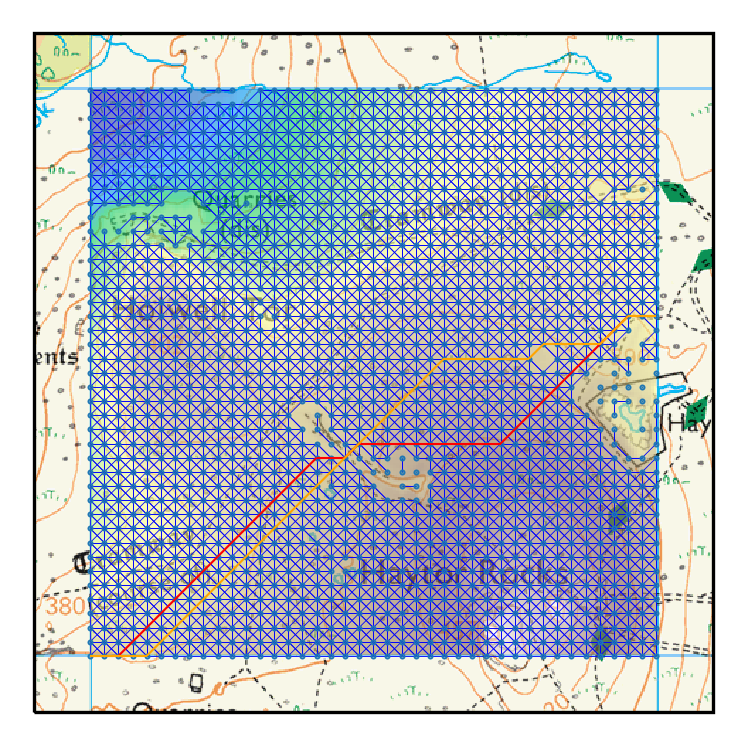

In [35]:
back_array = Haytor_map.read(1)
palette = np.array([value for key, value in Haytor_map.colormap(1).items()])
background_image = palette[back_array]
bounds = Haytor_map.bounds
extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)

fig = plt.figure(figsize=(3, 3), dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=crs.OSGB())

# display background map
ax.imshow(background_image, origin='upper', extent=extent, zorder=0)

# display elevation
rasterio.plot.show(elevation_mask, alpha=0.6, transform=transform_index, ax=ax, zorder=1,
                           cmap='terrain')

# displaying nodes
network_nodes.plot(ax=ax,zorder = 3,markersize=0.2)

#displaying links
network_links.plot(ax=ax,zorder = 2,edgecolor='blue', linewidth=0.2)

# display path
path_gpd.plot(ax=ax,zorder = 4,edgecolor='red', linewidth=0.5)
time_weighted_path_forward_gpd.plot(ax=ax,zorder = 5,edgecolor='orange', linewidth=0.5)
# time_weighted_path_backward_gpd.plot(ax=ax,zorder = 5,edgecolor='green', linewidth=0.5)


#set the extent to the study area
#study_area_gpd.plot(ax=ax,zorder = 2)
display_extent = ((study_area_shapely.bounds[0]- 100, study_area_shapely.bounds[2]+ 100,
                       study_area_shapely.bounds[1]- 100, study_area_shapely.bounds[3]+ 100))

ax.set_extent(display_extent, crs=crs.OSGB())
plt.show()
